<a href="https://colab.research.google.com/github/chongzicbo/nlp-ml-dl-notes/blob/master/code/key_word_extract/%E4%BD%BF%E7%94%A8NLP%E4%BB%8E%E6%96%87%E7%AB%A0%E4%B8%AD%E8%87%AA%E5%8A%A8%E6%8F%90%E5%8F%96%E5%85%B3%E9%94%AE%E5%AD%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#加载原始数据集
filePath="/content/drive/My Drive/data/关键字提取/papers.csv"
dataset=pd.read_csv(filePath)

原始数据集中存在大量摘要为“abstract”，在这里我简要的只取字符超过50的样本。

In [3]:
dataset.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [4]:
dataset=dataset[dataset['abstract'].str.len()>50]

剩余3924个样本

In [5]:
len(dataset)

3924

In [6]:
dataset.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
941,1861,2000,Algorithms for Non-negative Matrix Factorization,NaN,1861-algorithms-for-non-negative-matrix-factor...,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\nFactorizat...
1067,1975,2001,Characterizing Neural Gain Control using Spike...,NaN,1975-characterizing-neural-gain-control-using-...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\nspik...
2384,3163,2007,Competition Adds Complexity,NaN,3163-competition-adds-complexity.pdf,It is known that determinining whether a DEC-P...,Competition adds complexity\n\nJudy Goldsmith\...
2385,3164,2007,Efficient Principled Learning of Thin Junction...,NaN,3164-efficient-principled-learning-of-thin-jun...,We present the first truly polynomial algorith...,Efficient Principled Learning of Thin Junction...
2388,3167,2007,Regularized Boost for Semi-Supervised Learning,NaN,3167-regularized-boost-for-semi-supervised-lea...,Semi-supervised inductive learning concerns ho...,Regularized Boost for Semi-Supervised Learning...


In [7]:
#统计每个摘要中有多少个单词
dataset["word_count"]=dataset["abstract"].apply(lambda x:len(str(x).split(" ")))
dataset[["abstract","word_count"]].head()

,abstract,word_count
941,Non-negative matrix factorization (NMF) has pr...,107
1067,Spike-triggered averaging techniques are effec...,81
2384,It is known that determinining whether a DEC-P...,67
2385,We present the first truly polynomial algorith...,143
2388,Semi-supervised inductive learning concerns ho...,119


In [8]:
#对每个摘要中的单词数量做一个描述性统计
dataset.word_count.describe()

count    3924.000000
mean      148.390928
std        45.605755
min        19.000000
25%       116.000000
50%       143.000000
75%       177.000000
max       317.000000
Name: word_count, dtype: float64

In [9]:
#最常见的单词
freq=pd.Series("".join(dataset["abstract"]).split()).value_counts()[:20]
freq

the         29793
of          20918
a           16339
and         13626
to          12869
in           8980
that         7838
is           7666
for          7169
on           5579
we           5167
We           4995
with         4512
this         3677
as           3643
are          3529
an           3366
by           3197
can          2953
learning     2825
dtype: int64

In [10]:
#最不常见的单词
freq1=pd.Series(" ".join(dataset["abstract"]).split()).value_counts()[-20:]
freq1

co-occurrence.                    1
al.~(2012).                       1
requested,                        1
Data"                             1
Vectors                           1
attenuated                        1
encloses                          1
maxing                            1
downside                          1
specification.                    1
Attentive                         1
Classically,                      1
(CVaR).                           1
tween                             1
\emph{similarity}.                1
Wabbit                            1
\mathsf{poly}(1/\varepsilon))$    1
(symnets),                        1
Newton-type                       1
customizable                      1
dtype: int64

In [11]:
#文本预处理
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem=WordNetLemmatizer()
stem=PorterStemmer()
word="inversely"
print("stemming:",stem.stem(word))
print("lemmatization:",lem.lemmatize(word,"v"))

stemming: invers
lemmatization: inversely


In [12]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")
# nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#停用词
stop_words=set(stopwords.words("english"))

new_words=["using","show","result","large","also","iv","one","two","new","previously","shown"]
stop_words=stop_words.union(new_words)

In [14]:
corpus=[]
for text in dataset["abstract"]:
  #去除标点符号
  text=re.sub("[^a-zA-Z]"," ",text)
  #转换成小写
  text=text.lower()
  #去除标签
  text=re.sub("&lt;/?.*?&gt"," &lt;&gt; ",text)
  #去除特殊符号和数字
  text=re.sub("(\\d|\\W)+"," ",text)
  #字符串转为List
  text=text.split()
  ##Stemming
  ps=PorterStemmer()
  #Lemmatisation
  lem=WordNetLemmatizer()
  text=[lem.lemmatize(word) for word in text if not word in stop_words]
  text=" ".join(text)
  corpus.append(text)

In [15]:
corpus[0:2]

['non negative matrix factorization nmf useful decomposition multivariate data different multi plicative algorithm nmf analyzed differ slightly multiplicative factor used update rule algorithm minimize conventional least square error minimizes generalized kullback leibler divergence monotonic convergence algorithm proven auxiliary func tion analogous used proving convergence expectation maximization algorithm algorithm interpreted diag onally rescaled gradient descent rescaling factor optimally chosen ensure convergence',
 'spike triggered averaging technique effective linear characterization neural response neuron exhibit important nonlinear behavior gain control captured analysis describe spike triggered covariance method retrieving suppressive component gain control signal neuron demonstrate method simulation retinal ganglion cell data analysis physiological data reveals significant suppressive ax explains neural nonlinearities method applicable sensory area modality']

In [16]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud=WordCloud(background_color="white",stopwords=stop_words,max_words=100,max_font_size=50,random_state=42).generate(str(corpus))

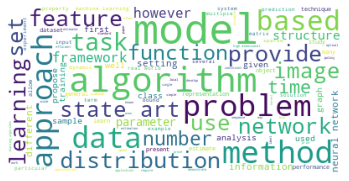

In [17]:
print(wordcloud)
fig=plt.figure(1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [19]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words,max_features=10000,ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [20]:
list(cv.vocabulary_.keys())[:10]

['non',
 'negative',
 'matrix',
 'factorization',
 'nmf',
 'useful',
 'decomposition',
 'multivariate',
 'data',
 'different']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'model'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'method'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'data'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'function'),
 Text(0, 0, 'based'),
 Text(0, 0, 'network'),
 Text(0, 0, 'time'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'result'),
 Text(0, 0, 'task'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'propose'),
 Text(0, 0, 'state'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'image'),
 Text(0, 0, 'performance')]

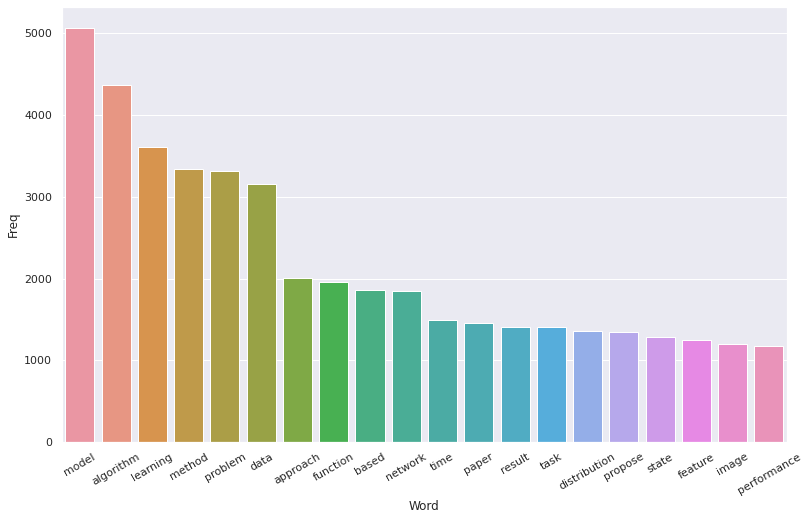

In [21]:
#出现最频繁的单词
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                   Bi-gram  Freq
0                state art   718
1           neural network   561
2         machine learning   413
3               real world   376
4       learning algorithm   350
5         high dimensional   326
6              lower bound   259
7                 data set   239
8            paper propose   237
9     optimization problem   225
10         graphical model   224
11     experimental result   220
12           loss function   208
13  reinforcement learning   205
14                low rank   202
15        gradient descent   188
16        gaussian process   184
17        learning problem   180
18        convergence rate   178
19     stochastic gradient   175


[Text(0, 0, 'state art'),
 Text(0, 0, 'neural network'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'lower bound'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'paper propose'),
 Text(0, 0, 'optimization problem'),
 Text(0, 0, 'graphical model'),
 Text(0, 0, 'experimental result'),
 Text(0, 0, 'loss function'),
 Text(0, 0, 'reinforcement learning'),
 Text(0, 0, 'low rank'),
 Text(0, 0, 'gradient descent'),
 Text(0, 0, 'gaussian process'),
 Text(0, 0, 'learning problem'),
 Text(0, 0, 'convergence rate'),
 Text(0, 0, 'stochastic gradient')]

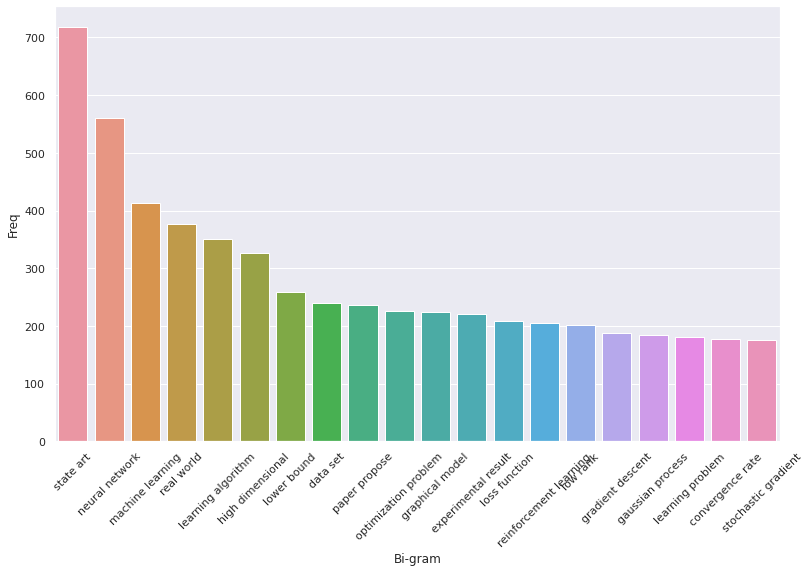

In [22]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0   convolutional neural network   100
1            deep neural network    96
2    stochastic gradient descent    84
3          state art performance    82
4            real world datasets    76
5       recurrent neural network    73
6               state art method    73
7                real world data    68
8        markov decision process    63
9                low rank matrix    63
10          synthetic real world    62
11      semi supervised learning    61
12            multi armed bandit    61
13         outperforms state art    60
14              state art result    60
15         latent variable model    57
16            markov chain monte    55
17             chain monte carlo    55
18  principal component analysis    50
19   empirical risk minimization    50


[Text(0, 0, 'convolutional neural network'),
 Text(0, 0, 'deep neural network'),
 Text(0, 0, 'stochastic gradient descent'),
 Text(0, 0, 'state art performance'),
 Text(0, 0, 'real world datasets'),
 Text(0, 0, 'recurrent neural network'),
 Text(0, 0, 'state art method'),
 Text(0, 0, 'real world data'),
 Text(0, 0, 'markov decision process'),
 Text(0, 0, 'low rank matrix'),
 Text(0, 0, 'synthetic real world'),
 Text(0, 0, 'semi supervised learning'),
 Text(0, 0, 'multi armed bandit'),
 Text(0, 0, 'outperforms state art'),
 Text(0, 0, 'state art result'),
 Text(0, 0, 'latent variable model'),
 Text(0, 0, 'markov chain monte'),
 Text(0, 0, 'chain monte carlo'),
 Text(0, 0, 'principal component analysis'),
 Text(0, 0, 'empirical risk minimization')]

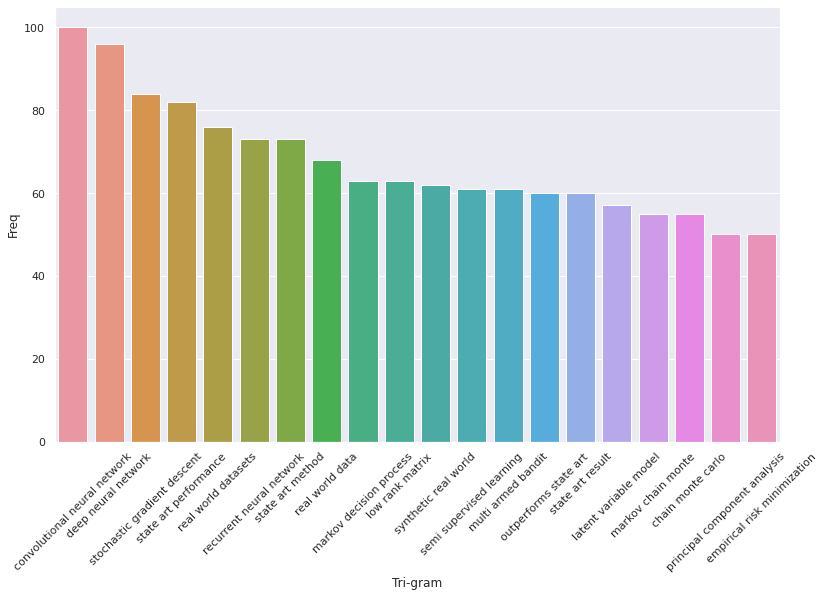

In [23]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [25]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
present theory compositionality stochastic optimal control showing task optimal controller constructed certain primitive primitive feedback controller pursuing agenda mixed proportion much progress making towards agenda compatible agenda present task resulting composite control law provably optimal problem belongs certain class class rather general yet number unique property bellman equation made linear even non linear discrete dynamic give rise compositionality developed special case linear dynamic gaussian noise framework yield analytical solution e non linear mixture linear quadratic regulator without requiring final cost quadratic generally natural set control primitive constructed applying svd green function bellman equation illustrate theory context human arm movement idea optimality compositionality prominent field motor control yet hard reconcile work make possible

Keywords:
compositionality 0.326
primitive 0.292
control 0.255
linear 0.212
controller 0.198


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

